In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error

import itertools
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_excel('CocaCola_Sales_Rawdata.xlsx', index_col=0, parse_dates=True)
data

,Sales
Quarter,
Q1_86,1734.827000
Q2_86,2244.960999
Q3_86,2533.804993
Q4_86,2154.962997
Q1_87,1547.818996
Q2_87,2104.411995
Q3_87,2014.362999
Q4_87,1991.746998
Q1_88,1869.049999


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42 entries, Q1_86 to Q2_96
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   42 non-null     float64
dtypes: float64(1)
memory usage: 672.0+ bytes


In [4]:
data.index

Index(['Q1_86', 'Q2_86', 'Q3_86', 'Q4_86', 'Q1_87', 'Q2_87', 'Q3_87', 'Q4_87',
       'Q1_88', 'Q2_88', 'Q3_88', 'Q4_88', 'Q1_89', 'Q2_89', 'Q3_89', 'Q4_89',
       'Q1_90', 'Q2_90', 'Q3_90', 'Q4_90', 'Q1_91', 'Q2_91', 'Q3_91', 'Q4_91',
       'Q1_92', 'Q2_92', 'Q3_92', 'Q4_92', 'Q1_93', 'Q2_93', 'Q3_93', 'Q4_93',
       'Q1_94', 'Q2_94', 'Q3_94', 'Q4_94', 'Q1_95', 'Q2_95', 'Q3_95', 'Q4_95',
       'Q1_96', 'Q2_96'],
      dtype='object', name='Quarter')

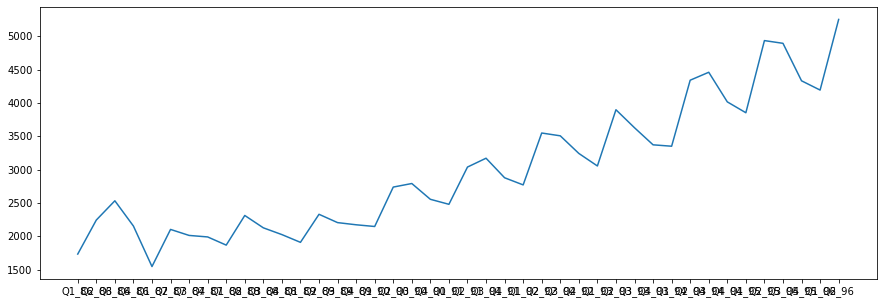

In [5]:
plt.figure(figsize=(15, 5))
plt.plot(data)

<AxesSubplot:ylabel='Density'>

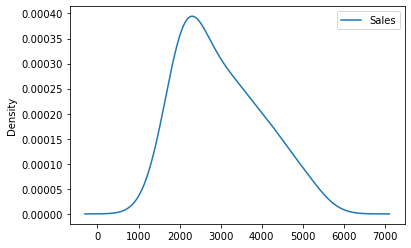

In [6]:
data.plot(kind='kde')

array([[<AxesSubplot:title={'center':'Sales'}>]], dtype=object)

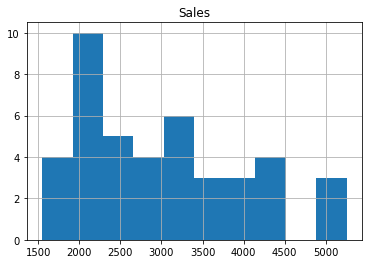

In [7]:
data.hist()

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

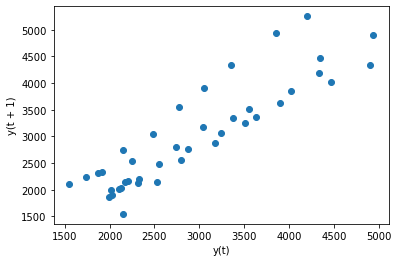

In [8]:
pd.plotting.lag_plot(data)

In [9]:
from statsmodels.graphics.tsaplots import plot_acf

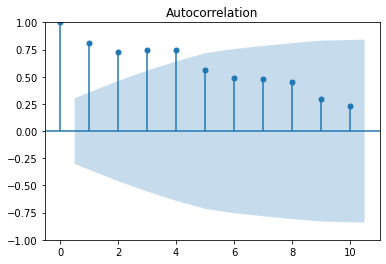

In [10]:
plot_acf(data, lags=10)
plt.show()

In [11]:
data = pd.read_excel('CocaCola_Sales_Rawdata.xlsx', index_col=0, header=0, parse_dates=True, squeeze=True)
data

Quarter
Q1_86    1734.827000
Q2_86    2244.960999
Q3_86    2533.804993
Q4_86    2154.962997
Q1_87    1547.818996
Q2_87    2104.411995
Q3_87    2014.362999
Q4_87    1991.746998
Q1_88    1869.049999
Q2_88    2313.631996
Q3_88    2128.320000
Q4_88    2026.828999
Q1_89    1910.603996
Q2_89    2331.164993
Q3_89    2206.549995
Q4_89    2173.967995
Q1_90    2148.278000
Q2_90    2739.307999
Q3_90    2792.753998
Q4_90    2556.009995
Q1_91    2480.973999
Q2_91    3039.522995
Q3_91    3172.115997
Q4_91    2879.000999
Q1_92    2772.000000
Q2_92    3550.000000
Q3_92    3508.000000
Q4_92    3243.859993
Q1_93    3056.000000
Q2_93    3899.000000
Q3_93    3629.000000
Q4_93    3373.000000
Q1_94    3352.000000
Q2_94    4342.000000
Q3_94    4461.000000
Q4_94    4017.000000
Q1_95    3854.000000
Q2_95    4936.000000
Q3_95    4895.000000
Q4_95    4333.000000
Q1_96    4194.000000
Q2_96    5253.000000
Name: Sales, dtype: float64

In [12]:
type(data)

pandas.core.series.Series

In [13]:
data.shape

(42,)

In [14]:
data = pd.read_excel('CocaCola_Sales_Rawdata.xlsx')

In [15]:
quarter = ['Q1', 'Q2', 'Q3', 'Q4']

In [16]:
P = data['Quarter'][0]
P[0:2]
data['quarter'] = 0
for i in range(42):
    P = data['Quarter'][i]
    data['quarter'][i] = P[0:2]
    
data

,Quarter,Sales,quarter
0,Q1_86,1734.827000,Q1
1,Q2_86,2244.960999,Q2
2,Q3_86,2533.804993,Q3
3,Q4_86,2154.962997,Q4
4,Q1_87,1547.818996,Q1
5,Q2_87,2104.411995,Q2
6,Q3_87,2014.362999,Q3
7,Q4_87,1991.746998,Q4
8,Q1_88,1869.049999,Q1
9,Q2_88,2313.631996,Q2


In [17]:
q_dummies = pd.DataFrame(pd.get_dummies(data['quarter']))
q_dummies

,Q1,Q2,Q3,Q4
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1
4,1,0,0,0
5,0,1,0,0
6,0,0,1,0
7,0,0,0,1
8,1,0,0,0
9,0,1,0,0


In [18]:
data = pd.concat([data, q_dummies], axis=1)
data

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,1,0,0,0
1,Q2_86,2244.960999,Q2,0,1,0,0
2,Q3_86,2533.804993,Q3,0,0,1,0
3,Q4_86,2154.962997,Q4,0,0,0,1
4,Q1_87,1547.818996,Q1,1,0,0,0
5,Q2_87,2104.411995,Q2,0,1,0,0
6,Q3_87,2014.362999,Q3,0,0,1,0
7,Q4_87,1991.746998,Q4,0,0,0,1
8,Q1_88,1869.049999,Q1,1,0,0,0
9,Q2_88,2313.631996,Q2,0,1,0,0


In [19]:
data['t'] = np.arange(1, 43)
data['t_square'] = np.square(data.t)
data['log_Sales'] = np.log(data.Sales)
data

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_square,log_Sales
0,Q1_86,1734.827000,Q1,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,1,0,0,0,5,25,7.344602
5,Q2_87,2104.411995,Q2,0,1,0,0,6,36,7.651791
6,Q3_87,2014.362999,Q3,0,0,1,0,7,49,7.608058
7,Q4_87,1991.746998,Q4,0,0,0,1,8,64,7.596767
8,Q1_88,1869.049999,Q1,1,0,0,0,9,81,7.533186
9,Q2_88,2313.631996,Q2,0,1,0,0,10,100,7.746574


## Forecasting

<AxesSubplot:>

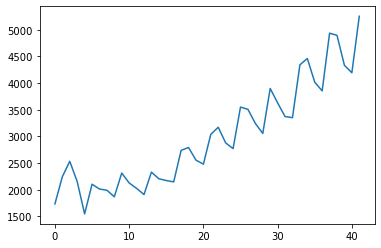

In [20]:
data['Sales'].plot()

<AxesSubplot:xlabel='quarter', ylabel='Sales'>

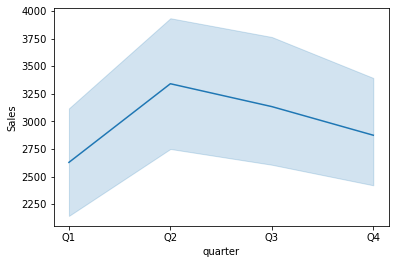

In [21]:
sns.lineplot(x='quarter', y='Sales', data=data)

In [22]:
train_data = data.head(30)
test_data = data.tail(10)

In [23]:
train_data

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_square,log_Sales
0,Q1_86,1734.827000,Q1,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,1,0,0,0,5,25,7.344602
5,Q2_87,2104.411995,Q2,0,1,0,0,6,36,7.651791
6,Q3_87,2014.362999,Q3,0,0,1,0,7,49,7.608058
7,Q4_87,1991.746998,Q4,0,0,0,1,8,64,7.596767
8,Q1_88,1869.049999,Q1,1,0,0,0,9,81,7.533186
9,Q2_88,2313.631996,Q2,0,1,0,0,10,100,7.746574


In [24]:
test_data

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_square,log_Sales
32,Q1_94,3352.0,Q1,1,0,0,0,33,1089,8.117312
33,Q2_94,4342.0,Q2,0,1,0,0,34,1156,8.376090
34,Q3_94,4461.0,Q3,0,0,1,0,35,1225,8.403128
35,Q4_94,4017.0,Q4,0,0,0,1,36,1296,8.298291
36,Q1_95,3854.0,Q1,1,0,0,0,37,1369,8.256867
37,Q2_95,4936.0,Q2,0,1,0,0,38,1444,8.504311
38,Q3_95,4895.0,Q3,0,0,1,0,39,1521,8.495970
39,Q4_95,4333.0,Q4,0,0,0,1,40,1600,8.374015
40,Q1_96,4194.0,Q1,1,0,0,0,41,1681,8.341410
41,Q2_96,5253.0,Q2,0,1,0,0,42,1764,8.566555


In [25]:
import statsmodels.formula.api as smf

In [26]:
#linear model
linear_model = smf.ols('Sales~t', data=train_data).fit()
pred_linear = pd.Series(linear_model.predict(pd.DataFrame(test_data['t'])))
rmse_linear = np.sqrt(np.mean((np.array(test_data['Sales'])-np.array(pred_linear))**2))
rmse_linear

777.6287139221071

In [27]:
#Exponential
Exp_model = smf.ols('log_Sales~t',data=train_data).fit()
pred_Exp = pd.Series(Exp_model.predict(pd.DataFrame(test_data['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(test_data['Sales'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

600.0893693739741

In [28]:
#Quadratic 
Quad_model = smf.ols('Sales~t+t_square',data=train_data).fit()
pred_Quad = pd.Series(Quad_model.predict(test_data[["t","t_square"]]))
rmse_Quad = np.sqrt(np.mean((np.array(test_data['Sales'])-np.array(pred_Quad))**2))
rmse_Quad

680.2527854192889

In [29]:
#Additive seasonality 
add_sea_model = smf.ols('Sales~Q1+Q2+Q3+Q4',data=train_data).fit()
pred_add_sea = pd.Series(add_sea_model.predict(test_data[['Q1', 'Q2', 'Q3', 'Q4']]))
rmse_add_sea = np.sqrt(np.mean((np.array(test_data['Sales'])-np.array(pred_add_sea))**2))
rmse_add_sea

1898.3504804157517

In [30]:
#Additive Seasonality Quadratic 
add_sea_Quad_model = smf.ols('Sales~t+t_square+Q1+Q2+Q3+Q4',data=train_data).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad_model.predict(test_data[['Q1', 'Q2', 'Q3', 'Q4','t','t_square']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(test_data['Sales'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

607.8520720183552

In [31]:
#Multiplicative Seasonality
Mul_sea_model = smf.ols('log_Sales~Q1+Q2+Q3+Q4',data = train_data).fit()
pred_Mult_sea = pd.Series(Mul_sea_model.predict(test_data))
rmse_Mult_sea = np.sqrt(np.mean((np.array(test_data['Sales'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

1951.0349399697623

In [32]:
#Multiplicative Additive Seasonality 
Mul_Add_sea_model = smf.ols('log_Sales~t+Q1+Q2+Q3+Q4',data = train_data).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea_model.predict(test_data))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(test_data['Sales'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

449.40354891629227

In [33]:
#Multiplicative Seasonality Quadratic 
mult_sea_Quad_model = smf.ols('log_Sales~t+t_square+Q1+Q2+Q3+Q4',data=train_data).fit()
pred_mult_sea_quad = pd.Series(mult_sea_Quad_model.predict(test_data[['Q1', 'Q2', 'Q3', 'Q4','t','t_square']]))
rmse_mult_sea_quad = np.sqrt(np.mean((np.array(test_data['Sales'])-np.array(pred_mult_sea_quad))**2))
rmse_mult_sea_quad

4387.550916638047

In [34]:
df = {"Model":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(df)
table_rmse.sort_values(['RMSE_Values'])

,Model,RMSE_Values
6,rmse_Mult_add_sea,449.403549
1,rmse_Exp,600.089369
4,rmse_add_sea_quad,607.852072
2,rmse_Quad,680.252785
0,rmse_linear,777.628714
3,rmse_add_sea,1898.350480
5,rmse_Mult_sea,1951.034940


In [35]:
model = smf.ols('Sales~t+t_square+Q1+Q2+Q3+Q4',data=data).fit()

In [36]:
pred_new  = pd.Series(model.predict(data))
pred_new

0     1626.592727
1     2268.402339
2     2189.685821
3     1867.242917
4     1658.311143
5     2314.185178
6     2249.533083
7     1941.154603
8     1746.287252
9     2416.225709
10    2365.638037
11    2071.323979
12    1890.521051
13    2574.523931
14    2538.000682
15    2257.751047
16    2091.012542
17    2789.079845
18    2766.621019
19    2500.435807
20    2347.761724
21    3059.893450
22    3051.499047
23    2799.378257
24    2660.768598
25    3386.964746
26    3392.634766
27    3154.578400
28    3030.033163
29    3770.293734
30    3790.028177
31    3566.036233
32    3455.555419
33    4209.880414
34    4243.679279
35    4033.751758
36    3937.335367
37    4705.724784
38    4753.588072
39    4557.724974
40    4475.373006
41    5257.826846
dtype: float64

In [37]:
data["forecasted_Sales"] = pd.Series(np.exp(pred_new))

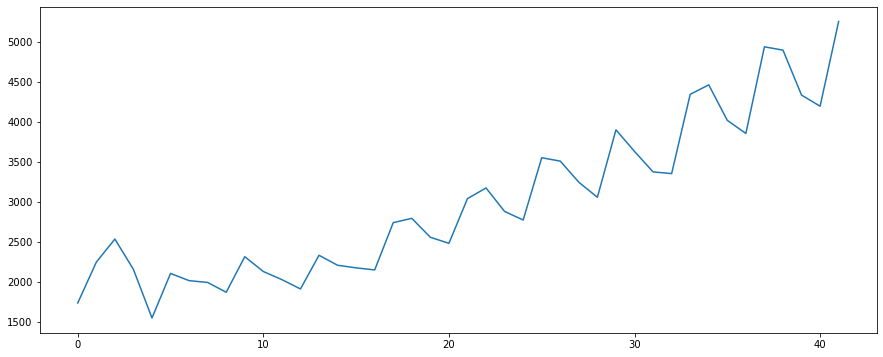

In [38]:
plt.figure(figsize=(15, 6))
plt.plot(data[['Sales', 'forecasted_Sales']].reset_index(drop=True))

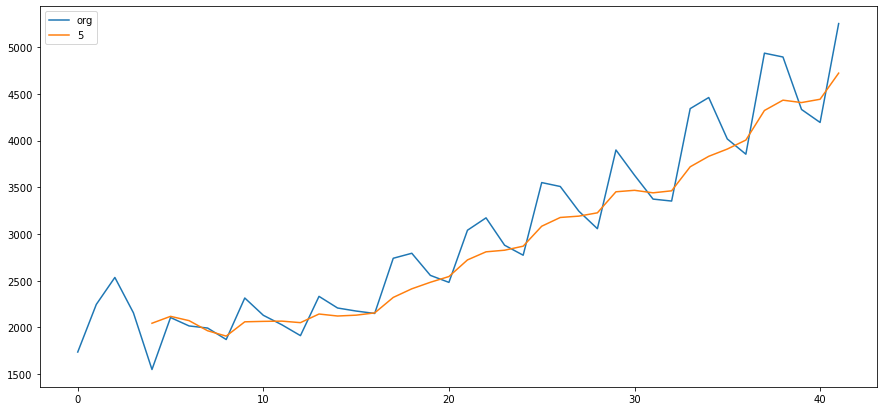

In [39]:
plt.figure(figsize=(15, 7))
data['Sales'].plot(label='org')
data['Sales'].rolling(5).mean().plot(label=str(5))
plt.legend(loc='best')

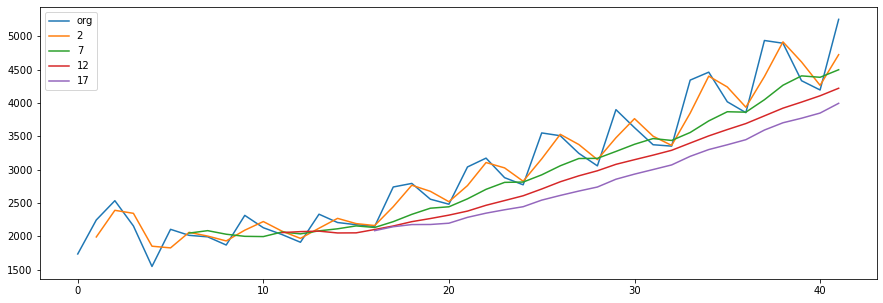

In [40]:
plt.figure(figsize=(15, 5))
data['Sales'].plot(label='org')
for i in range(2, 20, 5):
    data['Sales'].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

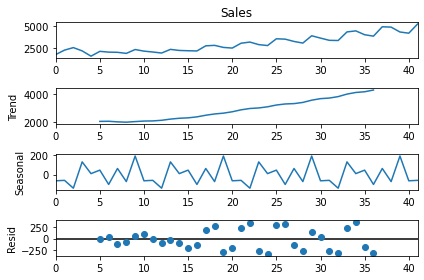

In [41]:
ts_decompose = seasonal_decompose(data['Sales'], period=10)
ts_decompose.plot()
plt.show()

In [42]:
import statsmodels.graphics.tsaplots as tsa_plots

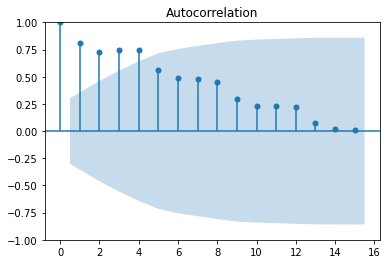

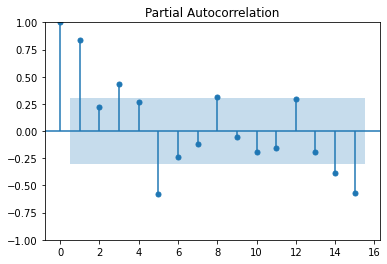

In [43]:
tsa_plots.plot_acf(data.Sales, lags=15)
tsa_plots.plot_pacf(data.Sales, lags=15)
plt.show()

In [44]:
def mape(pred, org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

In [45]:
ses_model = SimpleExpSmoothing(train_data["Sales"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = test_data.index[0],end = test_data.index[-1])
mape(pred_ses,test_data.Sales) 

24.909595430645957

In [46]:
# Holt method 
holt_model = Holt(train_data["Sales"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = holt_model.predict(start = test_data.index[0],end = test_data.index[-1])
mape(pred_hw,test_data.Sales) 

10.860719570932863

In [47]:
hwe_model_add_add = ExponentialSmoothing(train_data["Sales"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = test_data.index[0],end = test_data.index[-1])
mape(pred_hwe_add_add, test_data.Sales)

4.708406322873941

In [48]:
hwe_model_mul_add = ExponentialSmoothing(train_data["Sales"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = test_data.index[0],end = test_data.index[-1])
mape(pred_hwe_mul_add,test_data.Sales)

10.144403658568905

In [49]:
hwe_model_mul_add = ExponentialSmoothing(data["Sales"],seasonal="mul",trend="add",seasonal_periods=12).fit() 

In [50]:
hwe_model_mul_add.forecast(10)

42    5012.344209
43    4653.573883
44    4512.618744
45    5673.548341
46    5715.159774
47    5161.415217
48    4909.552114
49    6205.541243
50    6166.703338
51    5529.963063
dtype: float64